# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"  # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"  # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]  # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]  # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]  # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]  # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]  # YOUR CODE HERE
        city_country = city_weather["sys"]["country"]  # YOUR CODE HERE
        city_date = city_weather["dt"]   # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | merauke
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | awbari
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | sompeta
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | promyshlennyy
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | hue
Processing Record 20 of Set 1 | voi
Processing Record 21 

Processing Record 38 of Set 4 | torbay
Processing Record 39 of Set 4 | montepuez
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | kencong
Processing Record 42 of Set 4 | itacare
Processing Record 43 of Set 4 | tiarei
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | mocajuba
Processing Record 47 of Set 4 | sokone
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | avarua
Processing Record 0 of Set 5 | pak phanang
Processing Record 1 of Set 5 | san ramon
Processing Record 2 of Set 5 | aldan
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | evensk
Processing Record 6 of Set 5 | mut
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | biskamzha
Processing Record 9 of Set 5 | jacareacanga
Processing Record 10 of Set 5 | hrodna
Processing Record 11 of Set 5 | grand-santi
Processing Record 1

Processing Record 26 of Set 8 | poso
Processing Record 27 of Set 8 | maceio
Processing Record 28 of Set 8 | clinton
Processing Record 29 of Set 8 | bathsheba
Processing Record 30 of Set 8 | guayaramerin
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | teya
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | whitehorse
Processing Record 36 of Set 8 | santa rosa
Processing Record 37 of Set 8 | sennan
Processing Record 38 of Set 8 | salto
Processing Record 39 of Set 8 | soyo
Processing Record 40 of Set 8 | rovaniemi
Processing Record 41 of Set 8 | shorapani
Processing Record 42 of Set 8 | kapit
Processing Record 43 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 8 | miles city
Processing Record 45 of Set 8 | olinda
Processing Record 46 of Set 8 | marathon
Processing Record 47 of Set 8 | sitka
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | faya
Processing Re

Processing Record 15 of Set 12 | sangre grande
Processing Record 16 of Set 12 | fulitun
City not found. Skipping...
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | mulchen
Processing Record 20 of Set 12 | san ignacio
Processing Record 21 of Set 12 | fort smith
Processing Record 22 of Set 12 | skjaerhollen
City not found. Skipping...
Processing Record 23 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 24 of Set 12 | powell river
Processing Record 25 of Set 12 | jabiru
City not found. Skipping...
Processing Record 26 of Set 12 | birjand
Processing Record 27 of Set 12 | gushi
Processing Record 28 of Set 12 | maragogi
Processing Record 29 of Set 12 | resende
Processing Record 30 of Set 12 | saint-georges
Processing Record 31 of Set 12 | buala
Processing Record 32 of Set 12 | san diego
Processing Record 33 of Set 12 | galesong
Processing Record 34 of Set 12 | eyl
Processing Record 35 of Set 12 | s

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,merauke,-8.4667,140.3333,25.84,85,100,3.45,ID,1681018620
1,hermanus,-34.4187,19.2345,14.25,71,1,1.21,ZA,1681018620
2,nikolskoye,59.7035,30.7861,2.10,93,100,2.18,RU,1681018621
3,awbari,26.5921,12.7805,14.26,66,62,4.20,LY,1681018621
4,kaitangata,-46.2817,169.8464,13.66,81,59,6.61,NZ,1681018622


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,merauke,-8.4667,140.3333,25.84,85,100,3.45,ID,1681018620
1,hermanus,-34.4187,19.2345,14.25,71,1,1.21,ZA,1681018620
2,nikolskoye,59.7035,30.7861,2.10,93,100,2.18,RU,1681018621
3,awbari,26.5921,12.7805,14.26,66,62,4.20,LY,1681018621
4,kaitangata,-46.2817,169.8464,13.66,81,59,6.61,NZ,1681018622


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

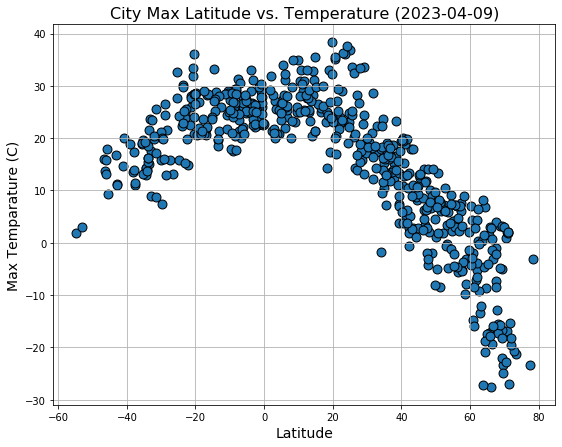

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
date = time.strftime("%Y-%m-%d", time.gmtime(city_data_df["Date"][0]))
plt.title(f"City Max Latitude vs. Temperature ({date})",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Max Temparature (C)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

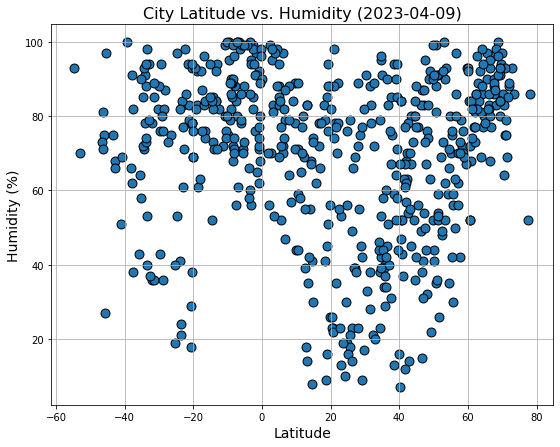

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity ({date})",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Humidity (%)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

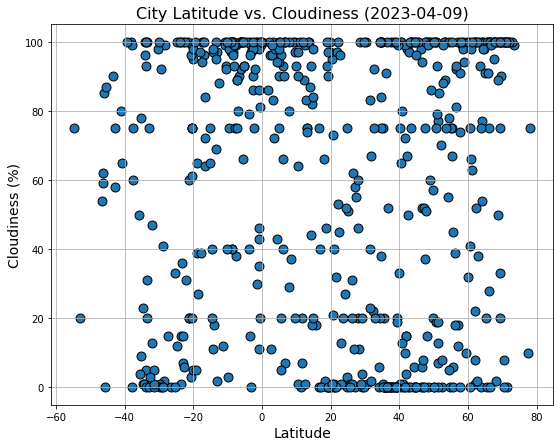

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness ({date})",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Cloudiness (%)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

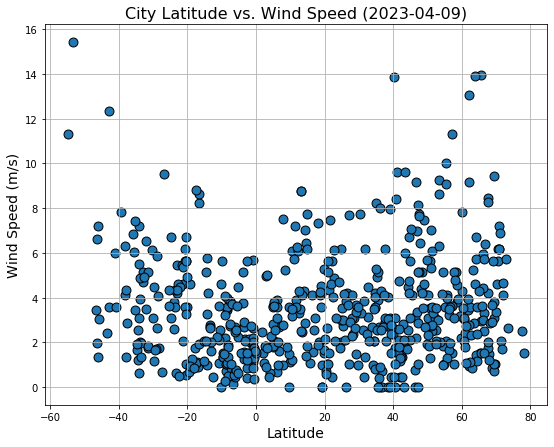

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed ({date})",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Wind Speed (m/s)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def calculate_regression_plot_graph(x_series, y_series, x_pos, y_pos):
    plt.figure(figsize=(9,7))
    plt.scatter(x=x_series, y=y_series, s=80)
    plt.xlabel("Latitude", fontdict={"size":14})
    plt.ylabel(y_series.name, fontdict={"size":14})
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_series, y_series)
    print(f"The r-value is: {pe_r**2}")
    pe_fit = pe_slope * x_series + pe_int
    plt.plot(x_series,pe_fit,"-",color="r")
    plt.text(x_pos, y_pos, f'y = {pe_slope:.2f}x + {pe_int:.2f}', fontsize=20, color='r')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nikolskoye,59.7035,30.7861,2.10,93,100,2.18,RU,1681018621
3,awbari,26.5921,12.7805,14.26,66,62,4.20,LY,1681018621
5,jamestown,42.0970,-79.2353,-0.55,68,4,0.45,US,1681018508
6,sompeta,18.9333,84.6000,33.01,45,0,4.15,IN,1681018623
8,promyshlennyy,67.5833,63.9167,-1.05,96,100,8.47,RU,1681018625


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0 , :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,merauke,-8.4667,140.3333,25.84,85,100,3.45,ID,1681018620
1,hermanus,-34.4187,19.2345,14.25,71,1,1.21,ZA,1681018620
4,kaitangata,-46.2817,169.8464,13.66,81,59,6.61,NZ,1681018622
7,ushuaia,-54.8000,-68.3000,1.81,93,75,11.32,AR,1681018594
9,east london,-33.0153,27.9116,17.52,94,75,5.14,ZA,1681018625


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7663842745504966


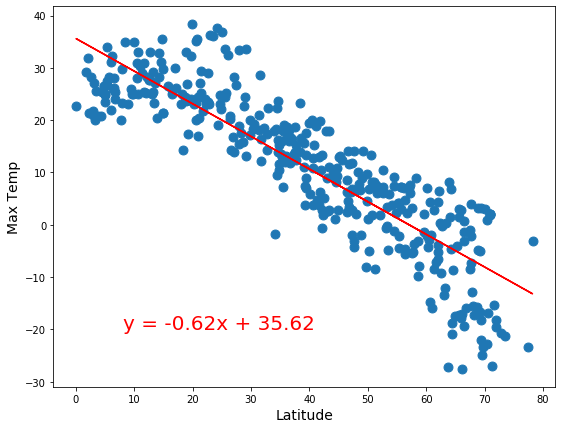

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
nh_lat_series = northern_hemi_df["Lat"]
nh_tmp_series = northern_hemi_df["Max Temp"]
calculate_regression_plot_graph(nh_lat_series, nh_tmp_series, 8, -20)

The r-value is: 0.46781416650299545


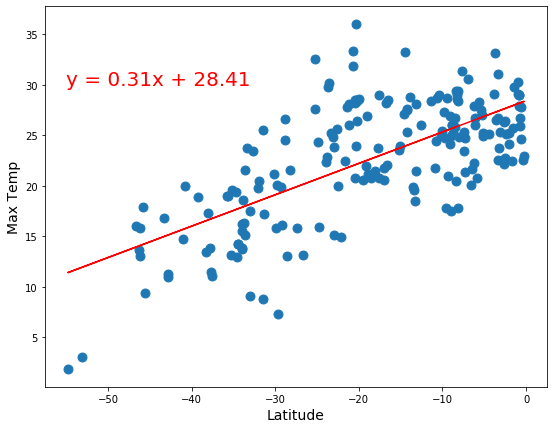

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
sh_lat_series = southern_hemi_df["Lat"]
sh_tmp_series = southern_hemi_df["Max Temp"]
calculate_regression_plot_graph(sh_lat_series, sh_tmp_series, -55, 30)

**Discussion the linear relationship:** YOUR RESPONSE HERE

- For Northern Hemisphere, there is a negative correlation between max temp and latitude which means as we go from equator (latitude = 0) towards northern hemisphere the temprateure decreases
- For Southern Hemisphere, there is a positive correlation between max temp and latitude which means as we go from southern hemisphere towards equator the temprature increases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05584782937310758


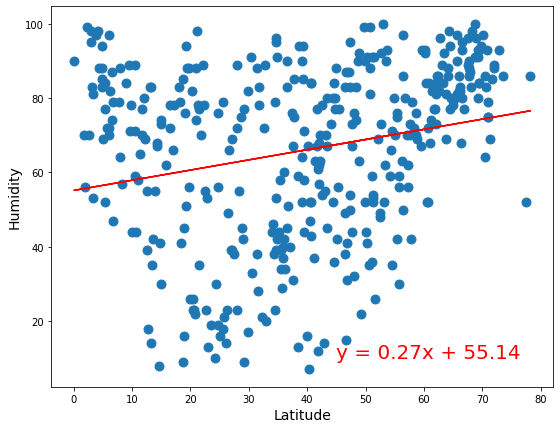

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
nh_hmd_series = northern_hemi_df["Humidity"]
calculate_regression_plot_graph(nh_lat_series, nh_hmd_series, 45, 10)

The r-value is: 0.07673041551800411


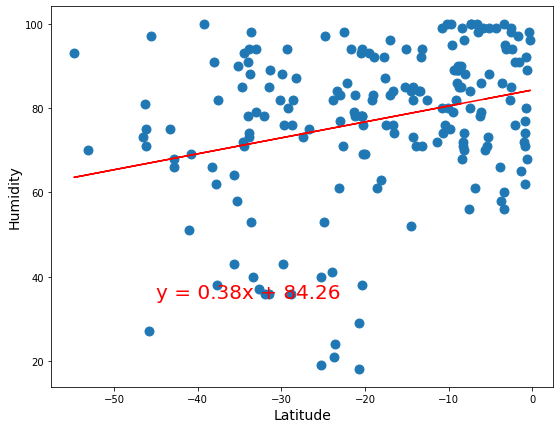

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
sh_hmd_series = southern_hemi_df["Humidity"]
calculate_regression_plot_graph(sh_lat_series, sh_hmd_series, -45, 35)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- For Northern Hemisphere, there is a positive correlation between humidity and latitude which means as we go from equator (latitude = 0) towards northern hemisphere the humidity increases
- For Southern Hemisphere, there is a positive correlation between humidity and latitude which means as we go from southern hemisphere towards equator the humidity increases

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008828664279925262


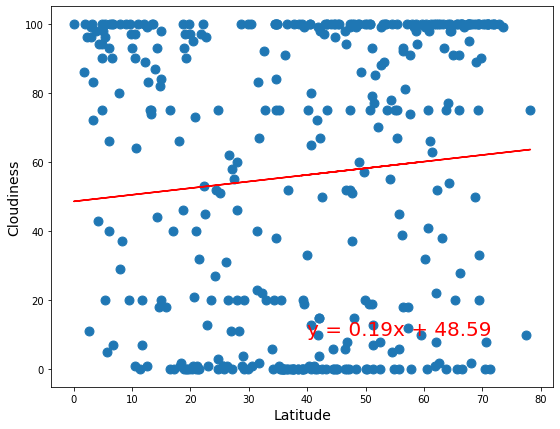

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
nh_cld_series = northern_hemi_df["Cloudiness"]
calculate_regression_plot_graph(nh_lat_series, nh_cld_series, 40, 10)

The r-value is: 0.112756868590705


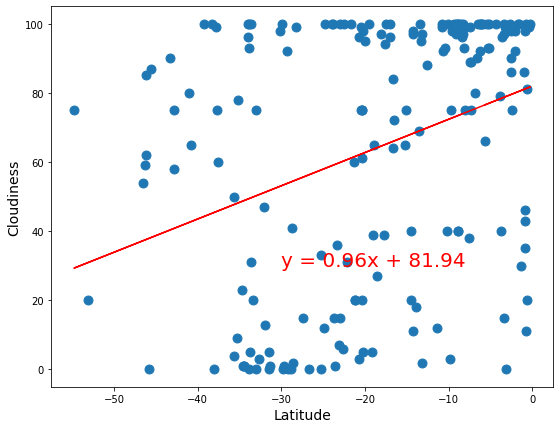

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
sh_cld_series = southern_hemi_df["Cloudiness"]
calculate_regression_plot_graph(sh_lat_series, sh_cld_series, -30, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- For Northern Hemisphere, there is a positive correlation between cloudiness and latitude which means as we go from equator (latitude = 0) towards northern hemisphere it becomes more cloudy
- For Southern Hemisphere, there is a positive correlation between cloudiness and latitude which means as we go from southern hemisphere towards equator it becomes more cloudy

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.021149518422025473


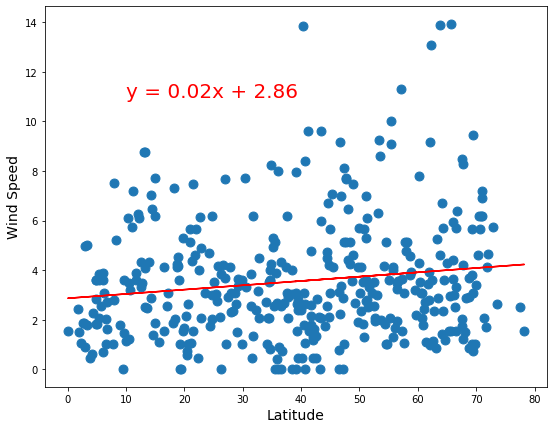

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
nh_wsp_series = northern_hemi_df["Wind Speed"]
calculate_regression_plot_graph(nh_lat_series, nh_wsp_series, 10, 11)

The r-value is: 0.2110419779273361


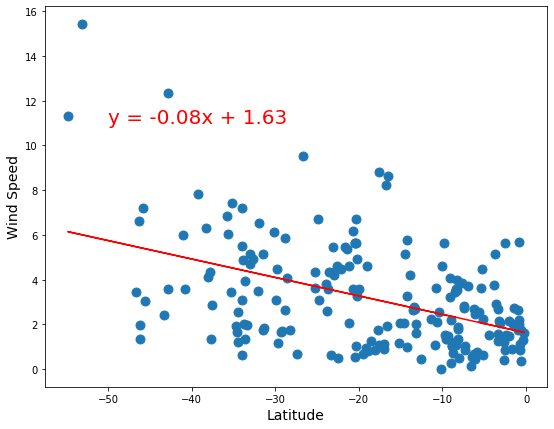

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
sh_wsp_series = southern_hemi_df["Wind Speed"]
calculate_regression_plot_graph(sh_lat_series, sh_wsp_series, -50, 11)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- For Northern Hemisphere, there is a slight positive correlation between wind speed and latitude which means as we go from equator (latitude = 0) towards northern hemisphere the wind speed slightly increases
- For Southern Hemisphere, there is a negative correlation between wind speed and latitude which means as we go from southern hemisphere towards equator the wind speed decreases